# Análisis Exploratorio de Datos - Parte 1: Preparación

## Ejemplo: consumo energético a nivel mundial

Objetivo:

1. Obtener el total de generación de energía eléctrica de un país en un rango de tiempo
2. Comparar gráficamente la generación energética de varios paises
3. Visualizar gráficamente la participación de cada tipo de generación de energía (% eólica, % hidroeléctrica, etc)

Vamos a leer el archivo "energia.csv". Revisemos el archivo directamente.

Los encabezados de los datos que me interesan son:

columna | descripción
-|-
country |	Geographic location
year|	Year of observation
carbonintensityelec	|Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_production	|Coal production, measured in terawatt-hours
electricity_generation	|Electricity generation, measured in terawatt-hours
biofuel_electricity	|Electricity generation from biofuels, measured in terawatt-hours
coal_electricity	|Electricity generation from coal, measured in terawatt-hours
fossil_electricity	|Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity	|Electricity generation from gas, measured in terawatt-hours
hydro_electricity	|Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity	|Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity	|Electricity generation from oil, measured in terawatt-hours
renewables_electricity	|Electricity generation from renewables, measured in terawatt-hours
solar_electricity	|Electricity generation from solar, measured in terawatt-hours
wind_electricity	|Electricity generation from wind, measured in terawatt-hours
gas_production	|Gas production, measured in terawatt-hours
oil_production	|Oil production, measured in terawatt-hours
population	|Total population

*Fuente: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption*

In [1]:
import pandas as pd

## Limpieza de datos

Debemos remover filas con campos vacíos (NaN) en la columna de Energía.

In [2]:
# Leer el archivo csv
energiaDf = pd.read_csv("energia.csv",delimiter=",")
# Crear un DataFrame que sólo contenga los campos necesarios
energiaDf = energiaDf[['country',
                       'year',
                       'electricity_generation',
                       'population']]

# Encontrar índices de las entradas completas (sin NaN o Null) en la columna 'biofuel_electricity'
noNulos = energiaDf[pd.notnull(energiaDf['electricity_generation'])].index
# print(noNulos)
# Crear el dataframe SOLO con los no nulos (usando los índices que acabamos de encontrar)
energiaDf = energiaDf.iloc[noNulos] # deja las entradas no nulas en columna biofuel_electricity
energiaDf

,country,year,electricity_generation,population
100,Afghanistan,2000,0.467,20780000.0
101,Afghanistan,2001,0.592,21607000.0
102,Afghanistan,2002,0.687,22601000.0
103,Afghanistan,2003,0.939,23681000.0
104,Afghanistan,2004,0.894,24727000.0
...,...,...,...,...
17427,Zimbabwe,2015,9.388,13815000.0
17428,Zimbabwe,2016,6.826,14030000.0
17429,Zimbabwe,2017,7.310,14237000.0
17430,Zimbabwe,2018,9.133,14439000.0


Entendamos un poco más sobre los datos que tenemos: primero podemos verificar cuáles son los nombres de los países involucrados

In [3]:
print(energiaDf['country'].value_counts().to_string())

Norway                              36
South Africa                        36
Thailand                            36
Belgium                             36
Vietnam                             36
Ireland                             36
Finland                             36
United Kingdom                      36
Kazakhstan                          36
Philippines                         36
Italy                               36
India                               36
Latvia                              36
Canada                              36
World                               36
Iran                                36
United States                       36
Peru                                36
Turkey                              36
Netherlands                         36
Denmark                             36
Mexico                              36
Lithuania                           36
Luxembourg                          36
Ukraine                             36
France                   

## Filtrado de datos

Vamos a generar un DataFrame que solo contenga información de un solo país, y por cierto rango de años

In [4]:
pais = "Colombia"
anio = 1990
# Busco las entradas que tengan "pais" en la columna "country"
energiaPaisDf = energiaDf.loc[(energiaDf['country'] == pais) & 
                           (energiaDf['year'] >= anio)]
energiaPaisDf

,country,year,electricity_generation,population
3556,Colombia,1990,38.246,33103000.0
3557,Colombia,1991,40.124,33758000.0
3558,Colombia,1992,36.613,34423000.0
3559,Colombia,1993,41.691,35091000.0
3560,Colombia,1994,45.024,35759000.0
3561,Colombia,1995,47.483,36421000.0
3562,Colombia,1996,48.371,37076000.0
3563,Colombia,1997,49.906,37724000.0
3564,Colombia,1998,50.283,38364000.0
3565,Colombia,1999,47.775,38999000.0


Ahora vamos a seleccionar varios paises

In [5]:
paises = ["Colombia","China","United States","Japan","Germany"]
anio = 1990
# Busco las entradas que tengan "pais" en la columna "country"
energiaPaisesDf = energiaDf.loc[(energiaDf['country'].isin(paises)) &
                              (energiaDf['year'] >= anio)]
energiaPaisesDf

,country,year,electricity_generation,population
3435,China,1990,621.200,1.176884e+09
3436,China,1991,677.550,1.192897e+09
3437,China,1992,753.940,1.206711e+09
3438,China,1993,811.590,1.218817e+09
3439,China,1994,927.800,1.230020e+09
...,...,...,...,...
16365,United States,2016,4095.487,3.230160e+08
16366,United States,2017,4058.261,3.250850e+08
16367,United States,2018,4203.937,3.270960e+08
16368,United States,2019,4161.834,3.290650e+08


Si necesito visualizar todo el DataFrame, puedo convertirlo en String y luego imprimirlo con print.

<span class="mark">Precaución: solo imprimir si el DataFrame es pequeño</span>

In [7]:
print(energiaPaisesDf.to_string())

             country  year  electricity_generation    population
3435           China  1990                 621.200  1.176884e+09
3436           China  1991                 677.550  1.192897e+09
3437           China  1992                 753.940  1.206711e+09
3438           China  1993                 811.590  1.218817e+09
3439           China  1994                 927.800  1.230020e+09
3440           China  1995                1007.030  1.240921e+09
3441           China  1996                1081.310  1.251636e+09
3442           China  1997                1135.550  1.261996e+09
3443           China  1998                1167.000  1.271982e+09
3444           China  1999                1239.300  1.281515e+09
3445           China  2000                1319.101  1.290551e+09
3446           China  2001                1463.931  1.299130e+09
3447           China  2002                1634.137  1.307352e+09
3448           China  2003                1858.612  1.315304e+09
3449           China  200

## Presentación de datos básica con Pandas

### Gráfico de línea

Vamos a generar nuestra primera gráfica de línea para la generación de energía eléctrica de un país individual (en Tera Watts).

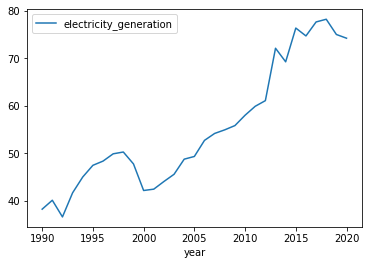

In [8]:
# Generación de gráfica directamente con pandas
ax = energiaPaisDf.plot.line(x='year',y='electricity_generation')

Esta es útil para graficar tendencias o datos que tienen una variable independiente incremental (usualmente el tiempo).

### Otros tipos de gráficos incorporados

Para un DataFrame, para el ejemplo nombrado "df", los principales tipos de gráficos incorporados son:

- df.plot.bar
- df.plot.barh
- df.plot.density
- df.plot.hist
- df.plot.scatter
- df.plot.box
- df.plot.hexbin
- df.plot.pie
- df.plot.area

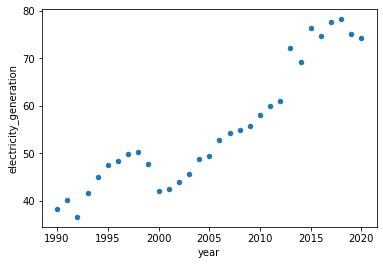

In [10]:
# Pruebe aquí los distintos tipos de gráficos
ax = energiaPaisDf.plot.scatter(x='year',y='electricity_generation')

Si intentamos usar estas gráficas para el DataFrame que tiene varios paises

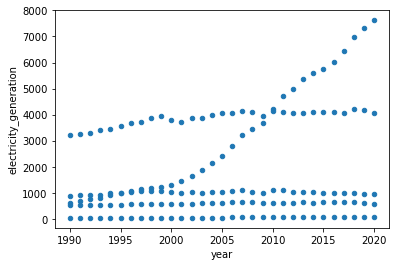

In [12]:
# Pruebe aquí los distintos tipos de gráficos
ax = energiaPaisesDf.plot.scatter(x='year',y='electricity_generation')

Después de probar varios tipos de gráficas, notamos que **nuestro dataset está configurado de tal forma que las columnas son compartidas por todos los países**. Si queremos comparar los datos de cada país, *debemos tener segmentados los datos completos por país*. Para realizar análisis gráfico, podemos generar un DataFrame por país, el cual contenga todos los datos asociados a este.

## Segmentación por valores

Para esto podemos usar un ciclo For que itere sobre la lista de paises, y en cada iteración, genere un DataFrame para cada país encontrado, para luego almacenarlo en un **diccionario de DataFrames**, donde las claves serán el nombre del país, y el valor será el DataFrame correspondiente (recordemos que un diccionario es una colección que puede contener cualquier cosa con una etiqueta llamada clave):

In [13]:
paises = ["Colombia","China","United States","Japan","Germany"]
anio = 1990
paisesDict = {}
for pais in paises:
    paisesDict[pais] = energiaDf[(energiaDf['country'] == pais) & 
                                 (energiaDf['year'] >= anio)]
paisesDict['China']

,country,year,electricity_generation,population
3435,China,1990,621.200,1.176884e+09
3436,China,1991,677.550,1.192897e+09
3437,China,1992,753.940,1.206711e+09
3438,China,1993,811.590,1.218817e+09
3439,China,1994,927.800,1.230020e+09
3440,China,1995,1007.030,1.240921e+09
3441,China,1996,1081.310,1.251636e+09
3442,China,1997,1135.550,1.261996e+09
3443,China,1998,1167.000,1.271982e+09
3444,China,1999,1239.300,1.281515e+09


### Eliminar columnas y redefinir el índice

Como vimos los DataFrames resultantes, la columna "country" no nos da información útil, ya que el nombre del país lo tenemos identificado en nuestro diccionario "paisesDict". También, podemos observar que el año puede ser un buen valor de índice. Por esto vamos a :

1. eliminar la columna "country"
2. definir el índice como el año

Nos aprovecharemos del encadenamiento de métodos, es decir, ejecutar múltiples funciones en una misma línea de código

In [14]:
for paisNombre,paisDf in paisesDict.items():
    # .drop(columns = "") para quitar columnas
    paisesDict[paisNombre] = paisesDict[paisNombre].drop(columns=["country"])
    # para cambiar el índice a una columna que yo escoja
    paisesDict[paisNombre] = paisesDict[paisNombre].set_index("year")
paisesDict

{'Colombia':       electricity_generation  population
 year                                    
 1990                  38.246  33103000.0
 1991                  40.124  33758000.0
 1992                  36.613  34423000.0
 1993                  41.691  35091000.0
 1994                  45.024  35759000.0
 1995                  47.483  36421000.0
 1996                  48.371  37076000.0
 1997                  49.906  37724000.0
 1998                  50.283  38364000.0
 1999                  47.775  38999000.0
 2000                  42.177  39630000.0
 2001                  42.461  40256000.0
 2002                  44.073  40875000.0
 2003                  45.594  41484000.0
 2004                  48.778  42076000.0
 2005                  49.347  42648000.0
 2006                  52.736  43201000.0
 2007                  54.196  43738000.0
 2008                  54.958  44255000.0
 2009                  55.854  44750000.0
 2010                  58.034  45223000.0
 2011                 

Ahora ya tenemos un DataFrame por pais, tratemos de graficar varios países en una misma gráfica. Notemos que si no especificamos una variable para el eje x, plot tomará por defecto el índice.

Colombia
China
United States
Japan
Germany


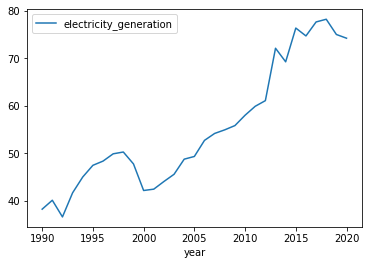

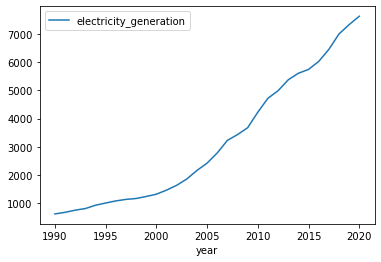

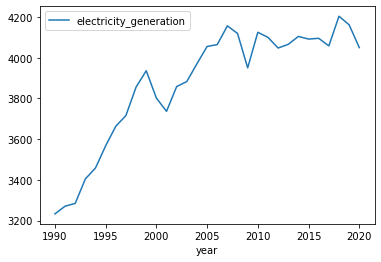

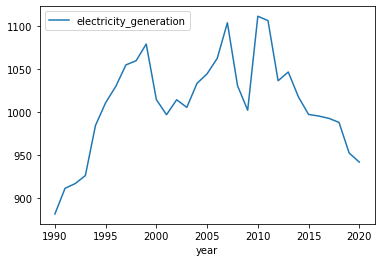

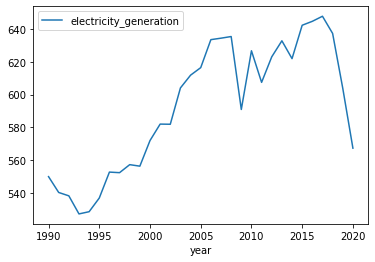

In [15]:
for paisNombre,paisDf in paisesDict.items():
    print(paisNombre)
    paisDf.plot.line(y='electricity_generation')

Como vemos, no resolvemos el problema, ya que cada llamado a df.plot.line() crea un lienzo nuevo.

Si queremos configurar las gráficas a nuestro gusto, debemos usar el módulo **matplotlib**, lo cual veremos en el siguiente cuaderno.

## Análisis

Vamos a crear un nuevo DataFrame con los cálculos estadísticos básicos. Para esto:

In [21]:
# 1. creamos un DataFrame vacío, al cual le agregaremos columnas (Series)
estadisticosDf = pd.DataFrame() 
# 2. declaramos un ciclo for para iterar por todos los DataFrames de paises de nuestro diccionario "paisesDict"
for paisNombre,paisDf in paisesDict.items():
    # 3. obtenemos los cálculos básicos con "describe()", esto nos entrega un DataFrame con promedios, conteos,
    # máximos, mínimos, entre otros; para cada columna. Yo solo quiero estos datos para la columna "electricity generation"
    # luego agrego esta columna al DataFrame "estadisticos", usando el nombre del país obtenido de las claves del diccionario
    estadisticosDf[paisNombre] = paisDf.describe()['electricity_generation']
    # 4. si quiero agregar filas extra, puedo agregar un elemento individual a la columna usando .at(['index','col'])
    # por ejemplo, la varianza
    estadisticosDf.at['varianza',paisNombre] = paisDf['electricity_generation'].var()
estadisticosDf

,Colombia,China,United States,Japan,Germany
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000
mean,55.243129,3.176146e+03,3873.951710,1011.245968,592.196290
std,13.122314,2.290291e+03,289.802562,56.886564,39.866653
min,36.613000,6.212000e+02,3232.780000,881.500000,527.118000
25%,45.309000,1.151275e+03,3726.510500,990.321000,554.485000
50%,50.283000,2.421429e+03,3970.555000,1014.289000,603.900000
75%,65.195500,5.179330e+03,4093.613500,1045.546500,629.850000
max,78.252000,7.623696e+03,4203.937000,1111.465000,647.900000
varianza,172.195120,5.245435e+06,83985.524894,3236.081114,1589.350000


Opcionalmente, podemos cambiar nombres de columnas o filas usando .rename()

In [22]:
# opcional: le cambiamos el nombre al índice.
estadisticosDf.index.names = ['indice']
# opcional: también podemos cambiar nombres de filas o columnas
estadisticosDf = estadisticosDf.rename(index={'mean':'promedio','25%':'percentil25',},
                                       columns={'Japan':'Japon'})
estadisticosDf

,Colombia,China,United States,Japon,Germany
indice,,,,,
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000
promedio,55.243129,3.176146e+03,3873.951710,1011.245968,592.196290
std,13.122314,2.290291e+03,289.802562,56.886564,39.866653
min,36.613000,6.212000e+02,3232.780000,881.500000,527.118000
percentil25,45.309000,1.151275e+03,3726.510500,990.321000,554.485000
50%,50.283000,2.421429e+03,3970.555000,1014.289000,603.900000
75%,65.195500,5.179330e+03,4093.613500,1045.546500,629.850000
max,78.252000,7.623696e+03,4203.937000,1111.465000,647.900000
varianza,172.195120,5.245435e+06,83985.524894,3236.081114,1589.350000


## Exportación de datos

Vamos a explorar la exportación de nuestros DataFrames resultantes. Pandas ofrece múltiples formatos de exportación, de los cuales revisaremos solamente dos: .csv (texto de valores separados por comas) y .xlsx (excel).

### .csv

este método me permite exportar un DataFrame específico a un archivo .csv. Vamos a hacer el experimento con el DataFrame de cálculos estadísticos llamado "estadisticos"

In [24]:
# usamos la función .to_csv, especificando el nombre del archivo y, opcionalmente, el separador a utilizar.
# usaremos ; ya que en español, el serparador por defecto es ; (para que excel lo entienda)
estadisticosDf.to_csv("estadisticos.csv",sep=',')

### Excel (.xlsx)

La exportación a excel cuenta con una ventaja: podemos exportar múltiples DataFrames a un mismo archivo, de manera que cada DataFrame quede en una hoja diferente.

Vamos a hacer la demostración creando el archivo "energiaPaises.xlsx", y agregando una hoja por cada país. Aprovechamos que tenemos un diccionario con los países, por lo que usaremos las claves para nombrar las hojas.

In [25]:
# creamos el archivo Excel. Es necesario usar engine='openpyxl' para sobreescribir archivos de excel.
with pd.ExcelWriter("energiaPaises.xlsx",engine='openpyxl') as miArchivoExcel:
    # luego iteramos sobre el diccionario para escribir cada DF en el mismo archivo, con hojas diferentes
    for paisNombre,paisDf in paisesDict.items():
        paisDf.to_excel(miArchivoExcel,sheet_name=paisNombre)
    # opcional: podemos agregar también el DataFrame de cálculos estadísticos
    estadisticosDf.to_excel(miArchivoExcel,sheet_name='estadisticos')

Si no tuvimos errores, ya podremos encontrar un archivo "energiaPaises.xlsx" que contiene cada DataFrame de país como una hoja independiente.

# Ejercicio

Modifique este cuaderno para obtener información de generación de energía eléctrica con las fuentes "renewables_electricity" y "fossil_electricity"